https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6

I have about 2,000 readers per day visiting my Medium blog. Some people clap after reading articles and some don’t. I’d like to make predictions about what percentage of people will engage and clap when I write a new blog post in the future.


![](https://miro.medium.com/max/1400/1*Y5NJF_SyPD3ogYfWDSz1GQ.png)

### 1. Generate X:
Let’s generate the data X. In real life, you don’t have any control over X. This is what you are going to observe.


Generating 2,000 readers' reponse.
Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
1 means clap. 0 means no clap.

In [2]:
import numpy as np

In [3]:
# We pick the success rate of 30%.
clap_prob = 0.3

# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

In [4]:
clap_data

array([1, 0, 0, ..., 1, 0, 0])

### 2. Bayesian Inference
#### Step 1 Prior P(θ)

Choose a PDF to model your parameter θ, aka the prior distribution P(θ).
This is your best guess about parameters before seeing the data X.

---
- What does the parameter θ represent?
The clapping 👏 probability.
- Then, what kind of probability distributions should we use to model a probability?
Beta distribution :
two parameters, α & β, that we need to decide.
 - You can think of α as How many people clap (the number of successes)
 and β as how many people don’t clap (the number of failures).

Let’s say you have data from yesterday and observed 400 people clapped out of total 2,000 visitors.

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [11]:
a=400
b=2000-a
theta_range=np.linspace(0,1,1000)
prior=stats.beta.pdf(x=theta_range,a=a,b=b)

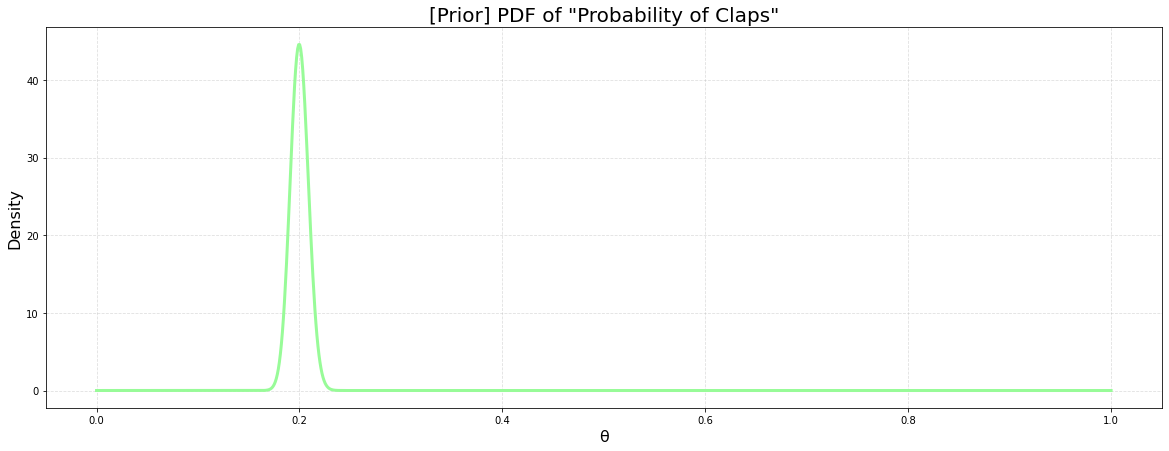

In [17]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')

plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.grid(alpha=.4, linestyle='--')

plt.show()


It spikes at 20% (400 claps / 2000 readers) as expected. Two thousand data points seem to produce a strong prior.
If we use fewer datapoints, say, 100 readers, the curve will be much less spiky. Try it with α = 20 & β = 80.

#### Step 2 Likelihood P(X|θ)

Choose a PDF for P(X|θ). Basically you are modeling how the data X will look like given the parameter θ.
Likelihood is also called a sampling distribution.


- What does our data X look like?
X is a binary array [0,1,0,1,...,0,0,0,1].
We also have the total number of visitors (n) and we want the probability of clap (p).
**Binomial distribution with n & p.**

In [14]:
likelihood=stats.binom.pmf(k=np.sum(clap_data),
                           n=len(clap_data),
                           p=a/(a+b))
likelihood

2.175906818881948e-24

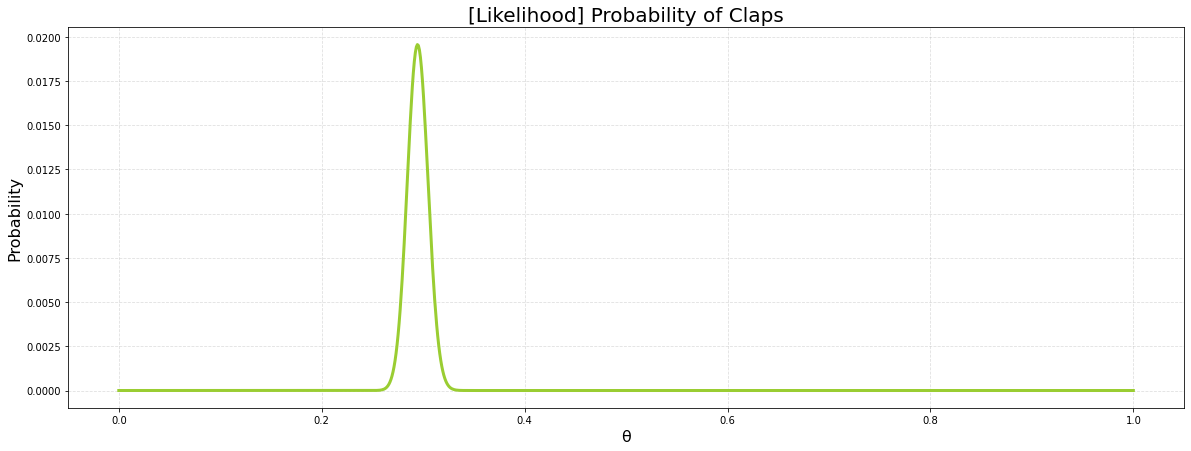

In [16]:
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range)

fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')

plt.title('[Likelihood] Probability of Claps' , fontsize=20)
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)

plt.grid(alpha=.4, linestyle='--')

plt.show()

#### Step 3 Posterior P(θ|X)

Calculate the posterior distribution P(θ|X) and pick the θ that has the highest P(θ|X).
And the posterior becomes the new prior. Repeat step 3 as you get more data.
- Your initial guess about parameters was P(θ). Now you are upgrading a simple P(θ) into something more informative — P(θ|X) — as more data become available.
- P(θ|X) is still the probability of θ, just like P(θ) is. However, P(θ|X) is a smarter version of P(θ).

In [18]:
theta_range_e = theta_range + 0.001
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b)



# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range)
posterior = likelihood * prior # element-wise multiplication
normalized_posterior = posterior / np.sum(posterior)

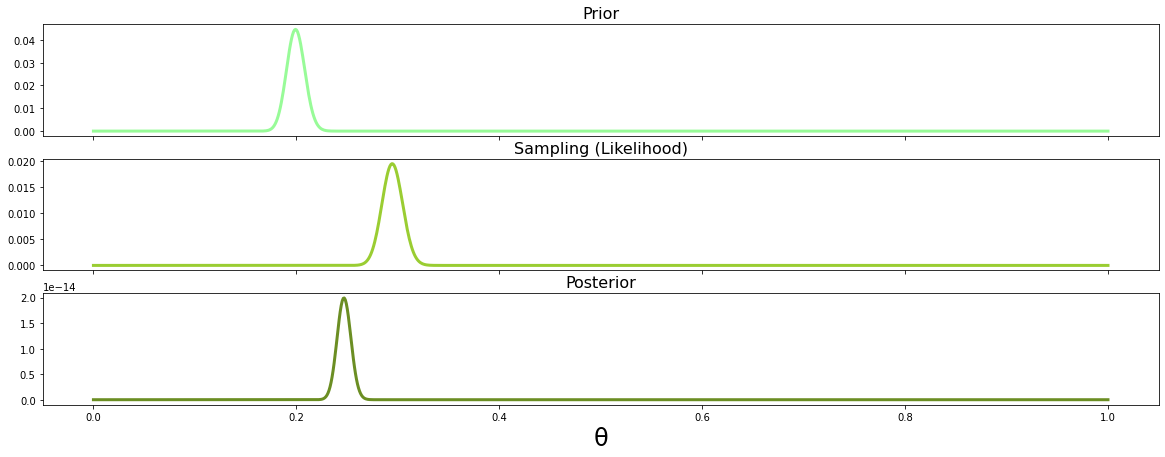

In [19]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

When you look at the posterior graph (the 3rd one), notice it is where the **likelihood shifted toward the prior**.
The clapping probability for the prior was 20%.
The clapping probability for the data was given as 30%.

Now, the posterior has its peak around 0.25%.


Also, notice the width of the bell curves in prior/likelihood has shrunk in the posterior.
- Because we incorporated more information through sampling, the range of possible parameters is now narrower.
- The more data you gather, the graph of the posterior will look more like that of the likelihood and less like that of the prior.
- In other words, as you get more data, the original prior distribution matters less.

Finally, we pick θ that gives the highest posterior computed by numerical optimization, such as the Gradient Descent or newton method. This whole iterative procedure is called Maximum A Posteriori estimation (MAP).